In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

In [2]:
dfPuntos = pd.read_csv("../dataLimpio/dfPuntos.csv",index_col=0)
dfPuntos

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,female,male,wep,activity_category
id,,,,,,,,,,,,
1,male,58,187,87,23,111,40.8,190,False,True,138,7
2,male,39,165,69,30,108,41.0,195,False,True,150,7
3,female,60,152,54,3,86,38.5,14,True,False,12,5
4,male,22,188,80,11,86,40.1,28,False,True,44,5
5,male,41,178,87,15,83,40.3,48,False,True,60,5
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,female,23,160,58,26,101,40.7,144,True,False,130,7
9997,female,57,161,61,23,102,40.5,143,True,False,115,7
9998,male,36,172,70,7,87,39.3,22,False,True,28,5


In [14]:
dfPuntos.iloc

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,female,male,wep,activity_category
id,,,,,,,,,,,,
12,male,72,202,111,20,94,40.5,137,False,True,100,5
13,male,25,186,90,1,84,37.9,3,False,True,4,5
14,female,70,154,57,4,81,38.7,17,True,False,16,5
15,female,22,165,64,15,93,40.3,69,True,False,75,5
16,female,24,175,73,11,87,39.8,42,True,False,44,5
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,female,23,160,58,26,101,40.7,144,True,False,130,7
9997,female,57,161,61,23,102,40.5,143,True,False,115,7
9998,male,36,172,70,7,87,39.3,22,False,True,28,5


In [3]:
X = dfPuntos[['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate','female', 'male', 'wep', 'activity_category']]
yLog = np.log1p(dfPuntos[["Calories"]])

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, yLog, test_size = 0.20, random_state=42) 

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 9)
(8000, 1)
(2000, 9)
(2000, 1)


In [ ]:

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)

model = tf.keras.Sequential([
  keras.layers.Dense(9,activation='linear', input_shape=(X_train.shape[1],)), 
  keras.layers.Dense(32, activation='relu'),  
 
  keras.layers.Dense(units=64, activation='relu'),  
  keras.layers.Dense(units=4, activation='softmax'),
  keras.layers.Dense(units=1, activation='linear') 
])

model.compile(optimizer='adam', loss='mse',metrics=['mae', 'mse'])

history = model.fit(X_train, y_train, epochs=50, validation_split=0.2,callbacks=[early_stopping])


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,363 (32.67 KB)

 Trainable params: 2,787 (10.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,576 (21.79 KB)

In [15]:

test_loss, test_mae, test_mse = model.evaluate(X_test, y_test)
print('Loss en test:', (test_loss))
print('MAE en test:', (test_mae))
print('MSE en test:', (test_mse))


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.2513e-04 - mae: 0.0163 - mse: 8.2513e-04
Loss en test: 0.0007952587329782546
MAE en test: 0.01633107289671898
MSE en test: 0.0007952587329782546


Visualice el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history`.

In [10]:

loss_train = history.history['loss']
loss_val = history.history['val_loss']


mae_train = history.history['mae']
mae_val = history.history['val_mae']


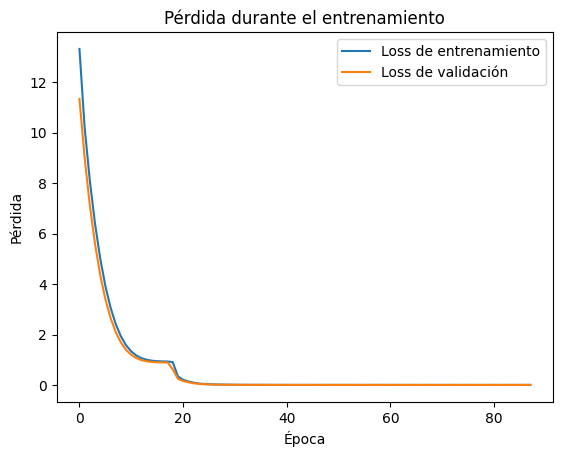

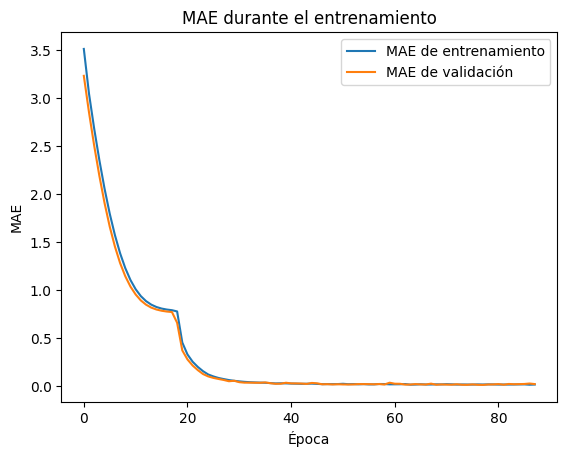

In [11]:
import matplotlib.pyplot as plt

plt.plot(loss_train, label='Loss de entrenamiento')
plt.plot(loss_val, label='Loss de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


plt.plot(mae_train, label='MAE de entrenamiento')
plt.plot(mae_val, label='MAE de validación')
plt.title('MAE durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.legend()
plt.show()


In [12]:

y_pred = model.predict(X_test)
y_pred = np.expm1(y_pred)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [13]:
y_pred

array([[206.88759 ],
       [105.75042 ],
       [133.42433 ],
       ...,
       [212.4699  ],
       [ 49.236813],
       [ 95.242325]], dtype=float32)

In [ ]:

if len(y_pred.shape) == 2 and y_pred.shape[1] == 1:
    y_pred = y_pred.reshape(-1)  


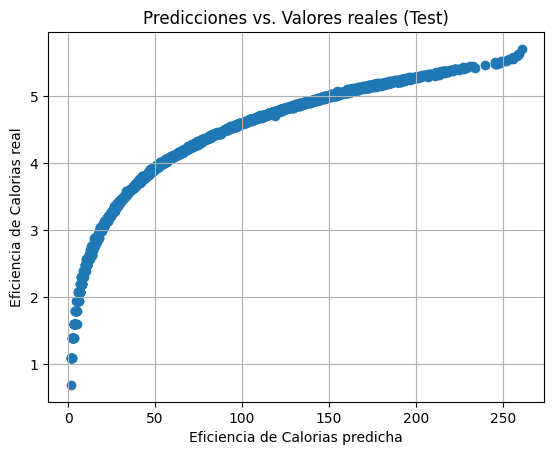

In [14]:

plt.scatter(y_pred, y_test)
plt.xlabel('Eficiencia de Calorias predicha')
plt.ylabel('Eficiencia de Calorias real')
plt.title('Predicciones vs. Valores reales (Test)')
plt.grid(True)
plt.show()


In [27]:

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)

model2 = tf.keras.Sequential([
  keras.layers.Dense(9,activation='linear', input_shape=(X_train.shape[1],)),  # Input layer
  keras.layers.Dense(32, activation='relu'),  # Hidden layer with ReLU activation
 
  keras.layers.Dense(units=64, activation='relu'),  # One-hot encoding for activity category
  keras.layers.Dense(units=1, activation='linear')  # Output layer with linear activation
])

model2.compile(optimizer='adam', loss='mse',metrics=['mae', 'mse'])




C:\Users\nicoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# Train the model (replace with your training data)
history2 = model2.fit(X_train, y_train, epochs=50, validation_split=0.2,callbacks=[early_stopping])

Epoch 1/100


200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 7.4003 - mae: 2.2249 - mse: 7.4003 - val_loss: 0.2736 - val_mae: 0.4100 - val_mse: 0.2736
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1832 - mae: 0.3226 - mse: 0.1832 - val_loss: 0.0446 - val_mae: 0.1482 - val_mse: 0.0446
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0403 - mae: 0.1391 - mse: 0.0403 - val_loss: 0.0244 - val_mae: 0.1082 - val_mse: 0.0244
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0246 - mae: 0.1097 - mse: 0.0246 - val_loss: 0.0168 - val_mae: 0.0892 - val_mse: 0.0168
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0170 - mae: 0.0897 - mse: 0.0170 - val_loss: 0.0140 - val_mae: 0.0839 - val_mse: 0.0140
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0115 - mae: 0.0745 - mse: 0.0115 - val_loss: 0.0118 - val_mae: 0.0762 - val_mse: 0.0118
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0090 - mae: 0.0629 - mse: 0.0090 - val_loss

In [29]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,763 (30.33 KB)

 Trainable params: 2,587 (10.11 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,176 (20.22 KB)

In [30]:

test_loss, test_mae, test_mse = model2.evaluate(X_test, y_test)
print('Loss en test:', (test_loss))
print('MAE en test:', (test_mae))
print('MSE en test:', (test_mse))


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0011 - mae: 0.0215 - mse: 0.0011
Loss en test: 0.0010897412430495024
MAE en test: 0.021598482504487038
MSE en test: 0.0010897412430495024


Visualice el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history`.

In [31]:

loss_train = history2.history['loss']
loss_val = history2.history['val_loss']


mae_train = history2.history['mae']
mae_val = history2.history['val_mae']


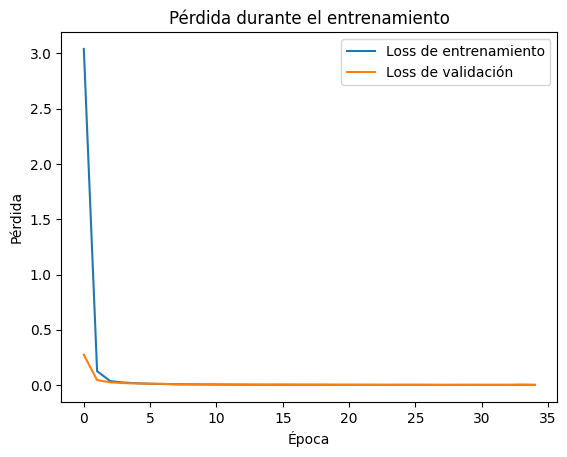

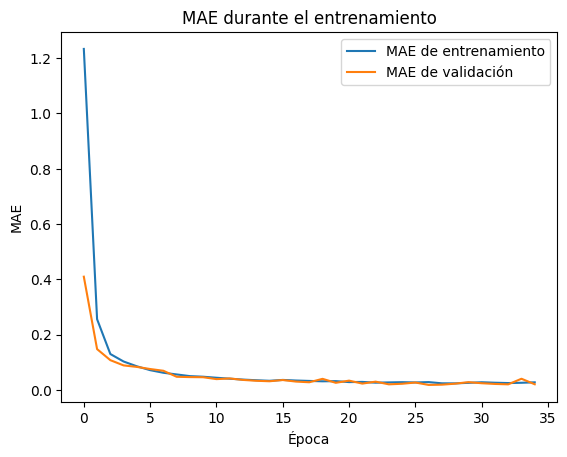

In [32]:
import matplotlib.pyplot as plt

plt.plot(loss_train, label='Loss de entrenamiento')
plt.plot(loss_val, label='Loss de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


plt.plot(mae_train, label='MAE de entrenamiento')
plt.plot(mae_val, label='MAE de validación')
plt.title('MAE durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.legend()
plt.show()


In [33]:

y_pred = model.predict(X_test)



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [34]:
y_pred = np.expm1(y_pred)
y_pred

array([[206.88759 ],
       [105.75042 ],
       [133.42433 ],
       ...,
       [212.4699  ],
       [ 49.236813],
       [ 95.242325]], dtype=float32)

In [ ]:

y_pred = model.predict(X_test)
y_pred = np.expm1(y_pred)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  


In [15]:

residuals = y_test - y_pred


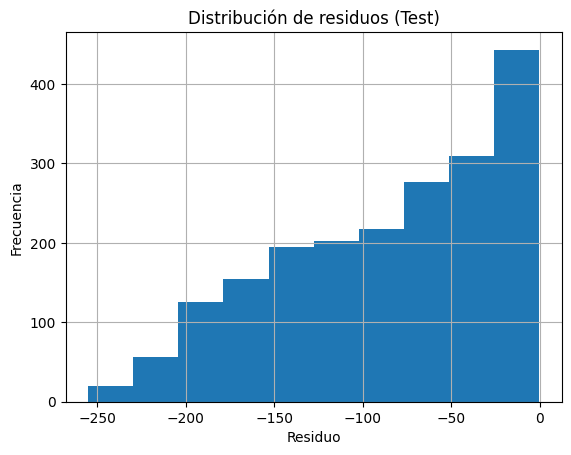

In [16]:

plt.hist(residuals)
plt.xlabel('Residuo')
plt.ylabel('Frecuencia')
plt.title('Distribución de residuos (Test)')
plt.grid(True)
plt.show()

In [27]:
model = tf.keras.Sequential([
  
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),

   
    tf.keras.layers.Dense(16, activation='relu'),

   
    tf.keras.layers.Dense(1)
])


model.compile(loss='mse', optimizer=tf.keras.optimizers.RMSprop(0.001), metrics=['mae', 'mse'])

C:\Users\nicoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,697 (6.63 KB)

 Trainable params: 1,697 (6.63 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
X

,Age,Height,Weight,Duration,Heart_Rate,female,male,wep,activity_category
id,,,,,,,,,
1,58,187,87,23,111,False,True,138,7
2,39,165,69,30,108,False,True,150,7
3,60,152,54,3,86,True,False,12,5
4,22,188,80,11,86,False,True,44,5
5,41,178,87,15,83,False,True,60,5
...,...,...,...,...,...,...,...,...,...
9996,23,160,58,26,101,True,False,130,7
9997,57,161,61,23,102,True,False,115,7
9998,36,172,70,7,87,False,True,28,5


In [32]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)


history = model.fit(scaler.transform(X), yLog, epochs=500, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 7.7448 - mae: 2.3569 - mse: 7.7448 - val_loss: 0.1182 - val_mae: 0.2663 - val_mse: 0.1182
Epoch 2/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0627 - mae: 0.1806 - mse: 0.0627 - val_loss: 0.0188 - val_mae: 0.0929 - val_mse: 0.0188
Epoch 3/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0162 - mae: 0.0869 - mse: 0.0162 - val_loss: 0.0302 - val_mae: 0.1377 - val_mse: 0.0302
Epoch 4/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0106 - mae: 0.0693 - mse: 0.0106 - val_loss: 0.0072 - val_mae: 0.0545 - val_mse: 0.0072
Epoch 5/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0082 - mae: 0.0616 - mse: 0.0082 - val_loss: 0.0165 - val_mae: 0.1001 - val_mse: 0.0165
Epoch 6/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0076 - mae: 0.0592 - mse: 0.0076 - val_loss: 0.0060 - val_mae: 0.0565 - val_mse: 0.0060
Epoch 7/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0066 - mae: 0.0550 - mse: 0.006

In [36]:
dfTestPuntos = pd.read_csv("../dataLimpio/dfTestPuntos.csv", index_col="id")
dfTestPuntos

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,female,male,wep,activity_category
id,,,,,,,,,,,
10001,female,66,171,65,28,96,40.6,True,False,140,5
10002,female,63,182,85,6,91,39.4,True,False,30,5
10003,female,48,175,75,11,92,40.0,True,False,55,5
10004,male,35,190,87,14,91,39.9,False,True,70,5
10005,female,49,148,54,29,101,40.8,True,False,145,7
...,...,...,...,...,...,...,...,...,...,...,...
13996,female,27,170,66,24,103,40.8,True,False,120,7
13997,male,26,193,87,5,87,39.2,False,True,20,5
13998,female,22,147,49,27,105,40.7,True,False,135,7


In [37]:
XFinal = dfTestPuntos[['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate','female', 'male', 'wep', 'activity_category']]
XFinalScal = scaler.transform(XFinal)

In [38]:

y_pred = model2.predict(XFinalScal)
y_pred = np.expm1(y_pred)


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [39]:
dfTest = pd.read_csv("../data/exercise-test.csv",index_col=0)


In [40]:
dfTest["Calories"] = y_pred.round(2)
modelo5=dfTest[["Calories"]]
modelo5

,Calories
id,
10001,168.949997
10002,28.730000
10003,53.209999
10004,57.250000
10005,175.100006
...,...
13996,137.279999
13997,15.610000
13998,162.529999


In [46]:
modelo5[["Calories"]].round(0)

,Calories
id,
10001,169.0
10002,29.0
10003,53.0
10004,57.0
10005,175.0
...,...
13996,137.0
13997,16.0
13998,163.0


In [30]:
modelo = modelo2

In [47]:
modelo5[["Calories"]].round(0).to_csv("../predicciones/modelo5.csv")

In [ ]:

residuals = y_test - y_pred


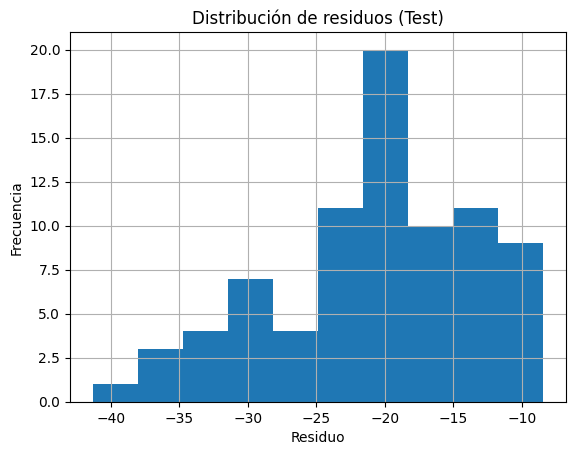

In [ ]:

plt.hist(residuals)
plt.xlabel('Residuo')
plt.ylabel('Frecuencia')
plt.title('Distribución de residuos (Test)')
plt.grid(True)
plt.show()

No es del todo gaussiano, pero podríamos esperar eso porque el número de muestras es muy pequeño.

Guarda tu modelo en un archivo.

In [32]:
model.save("../models/modelo.keras")

In [48]:
model.save('../models/kerasModel.h5') 

In [49]:
model.save('../models/kerasModel.keras')
